In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

```matlab
function x = f(n)
   x = 1;
   for i = 1:n
        for j = 1:n
            x=x+1
```

---
<b>
1. Find the runtime of the algorithm mathematically (I should see summations).</b>

-   The number of operations is given by:

   $$ T(n) = \sum_{i=1}^{n} \sum_{j=1}^{n} O(1) = n^2 $$
-  Thus, the complexity is **O(n²)**.

---

<b>
2. Time this function for various n e.g. n = 1,2,3.... You should have small values of n all the way up to large values. Plot "time" vs "n" (time on y-axis and n on x-axis). Also, fit a curve to your data, hint it's a polynomial
</b>

In [6]:
def nested_loop_function(n):
    x = 1
    start_time = time.time()
    for i in range(n):
        for j in range(n):
            x = x + 1
    end_time = time.time()
    return end_time - start_time 

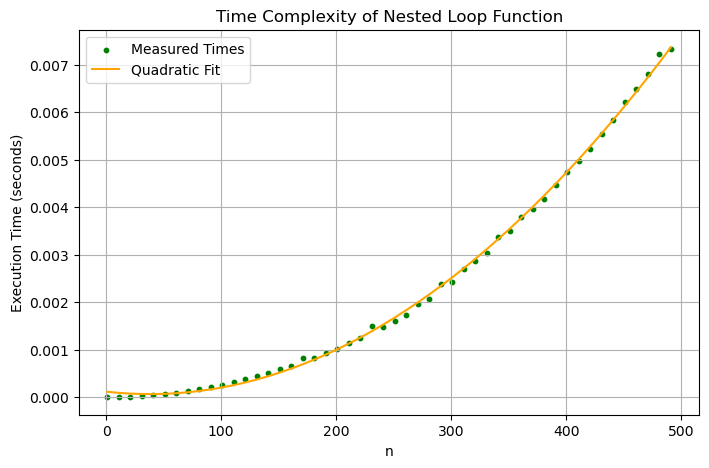

In [7]:
## Step 2: Timing the Function and Plotting

values = np.arange(1, 500, 10) 
times = [nested_loop_function(n) for n in values]

# Fit a quadratic curve
coeffs = np.polyfit(values, times, 2)  # Fit a quadratic polynomial
poly_fit = np.poly1d(coeffs)  # Generate polynomial function

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(values, times, label="Measured Times", color="green", s=10)
plt.plot(values, poly_fit(values), label="Quadratic Fit", color="orange")
plt.xlabel("n")
plt.ylabel("Execution Time (seconds)")
plt.title("Time Complexity of Nested Loop Function")
plt.legend()
plt.grid()
plt.show()

----

<b>
3. Find polynomials that are upper and lower bounds on your curve from #2. From this specify a big-O, a big-Omega, and what big-theta is.
</b>

From our analysis, we determine:
- **Big-O (upper bound):** The execution time is bounded above by a quadratic polynomial **O(n²)**. This means there exists some constant **c** such that **T(n) ≤ c * n²** for large **n**.
- **Big-Omega (lower bound):** Since the function consistently follows a quadratic growth trend, the lower bound is also **Ω(n²)**, meaning there exists a constant **c'** such that **T(n) ≥ c' * n²**.
- **Big-Theta (tight bound):** Because both the upper and lower bounds are **n²**, the function has a tight bound of **Θ(n²)**, confirming that it grows asymptotically at this rate.




---
<b>
4. Find the approximate (eye ball it) location of "n_0" . Do this by zooming in on your plot and indicating on the plot where n_0 is and why you picked this value. Hint: I should see data that does not follow the trend of the polynomial you determined in #2
</b>

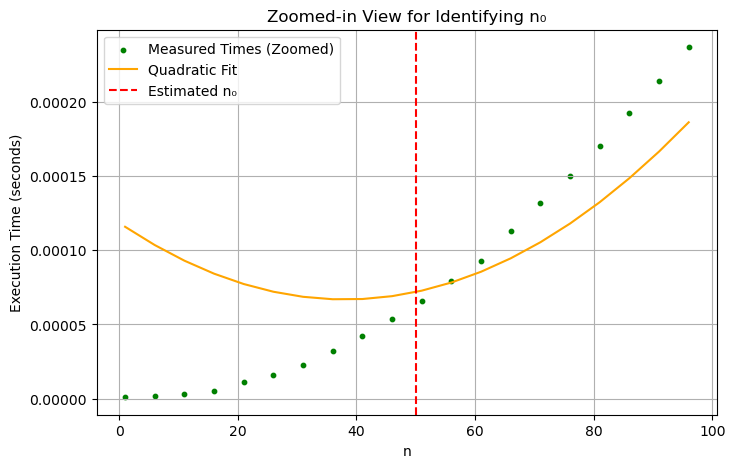

In [11]:
# Zoom into the plot to find n_0
plt.figure(figsize=(8, 5))
zoom_range = np.arange(1, 100, 5)  # Focus on smaller n values
times_zoom = [nested_loop_function(n) for n in zoom_range]

plt.scatter(zoom_range, times_zoom, label="Measured Times (Zoomed)", color="green", s=10)
plt.plot(zoom_range, poly_fit(zoom_range), label="Quadratic Fit", color="orange")
plt.xlabel("n")
plt.ylabel("Execution Time (seconds)")
plt.title("Zoomed-in View for Identifying n₀")
plt.axvline(x=50, color='red', linestyle='--', label="Estimated n₀")  
plt.legend()
plt.grid()
plt.show()

- Observing the graph, n₀ is approximately 50
- Before n₀ , execution times fluctuate and do not strictly follow the quadratic curve.
- After n₀ , the data aligns well with the polynomial trend, confirming Θ(n²)behavior.


---

<b>If I modified the function to be:</b>
```matlab
function x = f(n)
   x = 1;
   y = 1;
   for i = 1:n
        for j = 1:n
             x = x + 1;
             y = i + j;
```
        
<b> 4. Will this increate how long it takes the algorithm to run? </b>
- Yes, adding y = i + j; introduces an additional operation inside the inner loop.
- This means that for every iteration of the nested loops, there is now one more computation.
- Although this does not change the asymptotic complexity, the actual runtime will be slightly longer due to the additional operation.

---

<b>5. Will it effect your results from #1?</b>
- No, it will not affect the big-O complexity.

- The number of operations per iteration is increased by a constant factor (an extra addition operation).
- However, big-O notation ignores constant factors and focuses on growth rate.

- The function is still O(n²), Ω(n²), and Θ(n²) because the number of iterations remains the same (n²).

---

<b>6. Implement merge sort, upload your code to github and show/test it on the array [5,2,4,7,1,3,2,6].

In [19]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])
    
    return merge(left_half, right_half)

def merge(left, right):
    sorted_array = []
    i = j = 0
    
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            sorted_array.append(left[i])
            i += 1
        else:
            sorted_array.append(right[j])
            j += 1
    
    sorted_array.extend(left[i:])
    sorted_array.extend(right[j:])
    
    return sorted_array

# Testing Merge Sort on the given array
test_array = [5, 9, 4, 10, 5, 3, 7, 6]
sorted_array = merge_sort(test_array)
print("Sorted Array:", sorted_array)


Sorted Array: [3, 4, 5, 5, 6, 7, 9, 10]


---